In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import numpy as np

In [ ]:
df=pd.read_csv("/content/covid_19_india.csv",parse_dates=["Date"],dayfirst=True)

In [ ]:
df.shape

(18110, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Sno                       18110 non-null  int64         
 1   Date                      18110 non-null  datetime64[ns]
 2   Time                      18110 non-null  object        
 3   State/UnionTerritory      18110 non-null  object        
 4   ConfirmedIndianNational   18110 non-null  object        
 5   ConfirmedForeignNational  18110 non-null  object        
 6   Cured                     18110 non-null  int64         
 7   Deaths                    18110 non-null  int64         
 8   Confirmed                 18110 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 1.2+ MB


In [ ]:
df.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [ ]:
df.describe()

,Sno,Cured,Deaths,Confirmed
count,18110.000000,1.811000e+04,18110.000000,1.811000e+04
mean,9055.500000,2.786375e+05,4052.402264,3.010314e+05
std,5228.051023,6.148909e+05,10919.076411,6.561489e+05
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,4528.250000,3.360250e+03,32.000000,4.376750e+03
50%,9055.500000,3.336400e+04,588.000000,3.977350e+04
75%,13582.750000,2.788698e+05,3643.750000,3.001498e+05
max,18110.000000,6.159676e+06,134201.000000,6.363442e+06


In [ ]:
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [ ]:
# take required columns
df=df[["Date","State/UnionTerritory","Cured","Deaths","Confirmed"]]

In [ ]:
df.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [ ]:
today=df[df.Date=="2020/07/7"]
today

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
3819,2020-07-07,Andaman and Nicobar Islands,74,0,141
3820,2020-07-07,Andhra Pradesh,8920,239,20019
3821,2020-07-07,Arunachal Pradesh,92,2,270
3822,2020-07-07,Assam,7882,14,12160
3823,2020-07-07,Bihar,8997,97,12125
3824,2020-07-07,Chandigarh,401,6,489
3825,2020-07-07,Chhattisgarh,2667,14,3305
3826,2020-07-07,Dadra and Nagar Haveli and Daman and Diu,114,0,297
3827,2020-07-07,Delhi,72088,3115,100823
3828,2020-07-07,Goa,1061,7,1813


In [ ]:
#sorting data with respect to confirmed cases
max_confirmed_cases=today.sort_values(by="Confirmed",ascending=False)
max_confirmed_cases

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
3838,2020-07-07,Maharashtra,115262,9026,211987
3848,2020-07-07,Tamil Nadu,66571,1571,114978
3827,2020-07-07,Delhi,72088,3115,100823
3829,2020-07-07,Gujarat,26315,1960,36772
3852,2020-07-07,Uttar Pradesh,19109,809,28636
3849,2020-07-07,Telengana,14781,306,25733
3834,2020-07-07,Karnataka,10527,401,25317
3853,2020-07-07,West Bengal,15235,779,22987
3846,2020-07-07,Rajasthan,16278,461,20688
3820,2020-07-07,Andhra Pradesh,8920,239,20019


In [ ]:
# Extract top five states with comfirmed
top_states_confirmed=max_confirmed_cases[0:5]
top_states_confirmed

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
3838,2020-07-07,Maharashtra,115262,9026,211987
3848,2020-07-07,Tamil Nadu,66571,1571,114978
3827,2020-07-07,Delhi,72088,3115,100823
3829,2020-07-07,Gujarat,26315,1960,36772
3852,2020-07-07,Uttar Pradesh,19109,809,28636


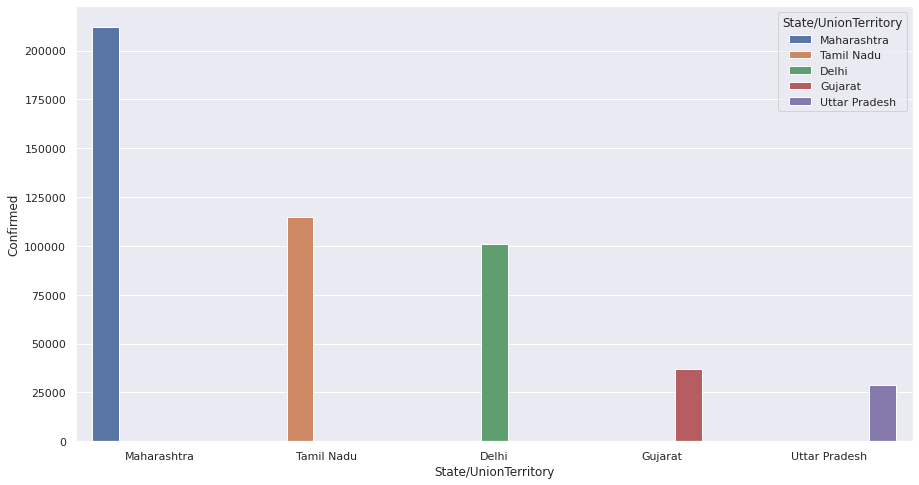

In [ ]:
sns.set(rc={"figure.figsize":[15,8]})
sns.barplot(x="State/UnionTerritory",y="Confirmed",data=top_states_confirmed,hue="State/UnionTerritory")
plt.show()

In [ ]:
max_deaths_cases=today.sort_values(by="Deaths",ascending=False)
max_deaths_cases

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
3838,2020-07-07,Maharashtra,115262,9026,211987
3827,2020-07-07,Delhi,72088,3115,100823
3829,2020-07-07,Gujarat,26315,1960,36772
3848,2020-07-07,Tamil Nadu,66571,1571,114978
3852,2020-07-07,Uttar Pradesh,19109,809,28636
3853,2020-07-07,West Bengal,15235,779,22987
3837,2020-07-07,Madhya Pradesh,11579,617,15284
3846,2020-07-07,Rajasthan,16278,461,20688
3834,2020-07-07,Karnataka,10527,401,25317
3849,2020-07-07,Telengana,14781,306,25733


In [ ]:
max_cured_cases=today.sort_values(by="Cured",ascending=False)
max_cured_cases

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
3838,2020-07-07,Maharashtra,115262,9026,211987
3827,2020-07-07,Delhi,72088,3115,100823
3848,2020-07-07,Tamil Nadu,66571,1571,114978
3829,2020-07-07,Gujarat,26315,1960,36772
3852,2020-07-07,Uttar Pradesh,19109,809,28636
3846,2020-07-07,Rajasthan,16278,461,20688
3853,2020-07-07,West Bengal,15235,779,22987
3849,2020-07-07,Telengana,14781,306,25733
3830,2020-07-07,Haryana,13335,276,17504
3837,2020-07-07,Madhya Pradesh,11579,617,15284


In [ ]:
top_states_cured=max_cured_cases[0:5]
top_states_cured

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
3838,2020-07-07,Maharashtra,115262,9026,211987
3827,2020-07-07,Delhi,72088,3115,100823
3848,2020-07-07,Tamil Nadu,66571,1571,114978
3829,2020-07-07,Gujarat,26315,1960,36772
3852,2020-07-07,Uttar Pradesh,19109,809,28636


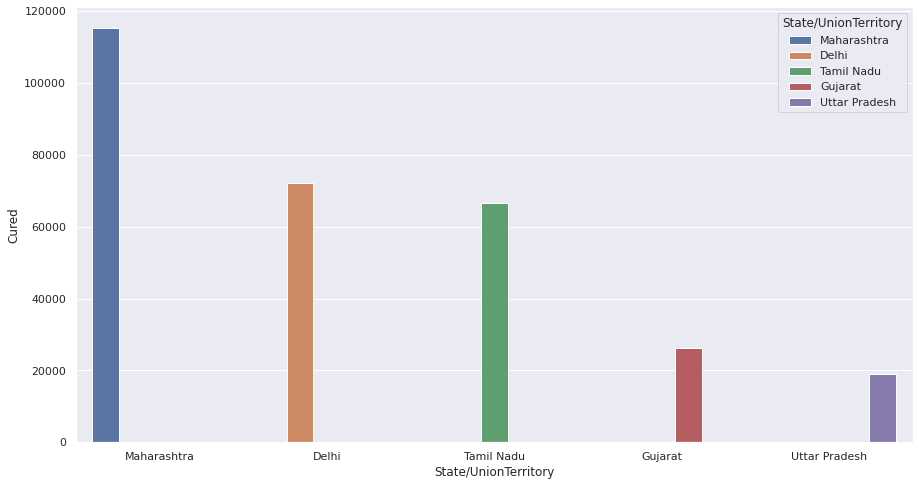

In [ ]:
sns.set(rc={"figure.figsize":[15,8]})
sns.barplot(x="State/UnionTerritory",y="Cured",data=top_states_cured,hue="State/UnionTerritory")
plt.show()

In [ ]:
# Renaming columns names
df.columns = ["date","state","cured","deaths","confirmed"]
df

,date,state,cured,deaths,confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3
...,...,...,...,...,...
18105,2021-08-11,Telangana,638410,3831,650353
18106,2021-08-11,Tripura,77811,773,80660
18107,2021-08-11,Uttarakhand,334650,7368,342462
18108,2021-08-11,Uttar Pradesh,1685492,22775,1708812


In [ ]:
#Bihar
Bihar=df[df.state=="Bihar"]
Bihar

,date,state,cured,deaths,confirmed
271,2020-03-22,Bihar,0,1,2
294,2020-03-23,Bihar,0,1,2
317,2020-03-24,Bihar,0,1,3
341,2020-03-25,Bihar,0,1,4
367,2020-03-26,Bihar,0,1,6
...,...,...,...,...,...
17934,2021-08-07,Bihar,715119,9646,725122
17970,2021-08-08,Bihar,715191,9646,725158
18006,2021-08-09,Bihar,715236,9646,725192
18042,2021-08-10,Bihar,715303,9646,725235


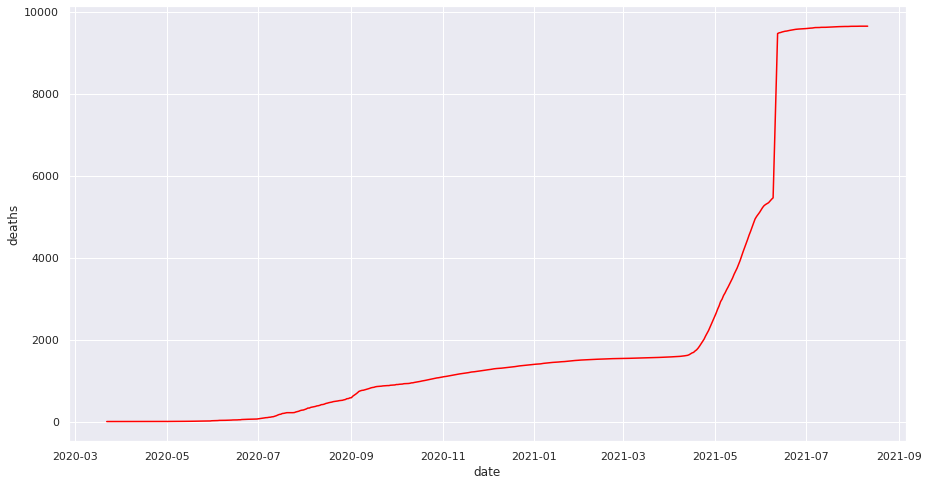

In [ ]:
# visualizing death case in Bihar
sns.set(rc={"figure.figsize":(15,8)})
sns.lineplot(x="date",y="deaths",data=Bihar,color="red")
plt.show()

In [ ]:
Tamil_Nadu=df[df.state=="Tamil Nadu"]
Delhi=df[df.state=="Delhi"]
Gujarat=df[df.state=="Gujarat"]
Bihar=df[df.state=="Bihar"]

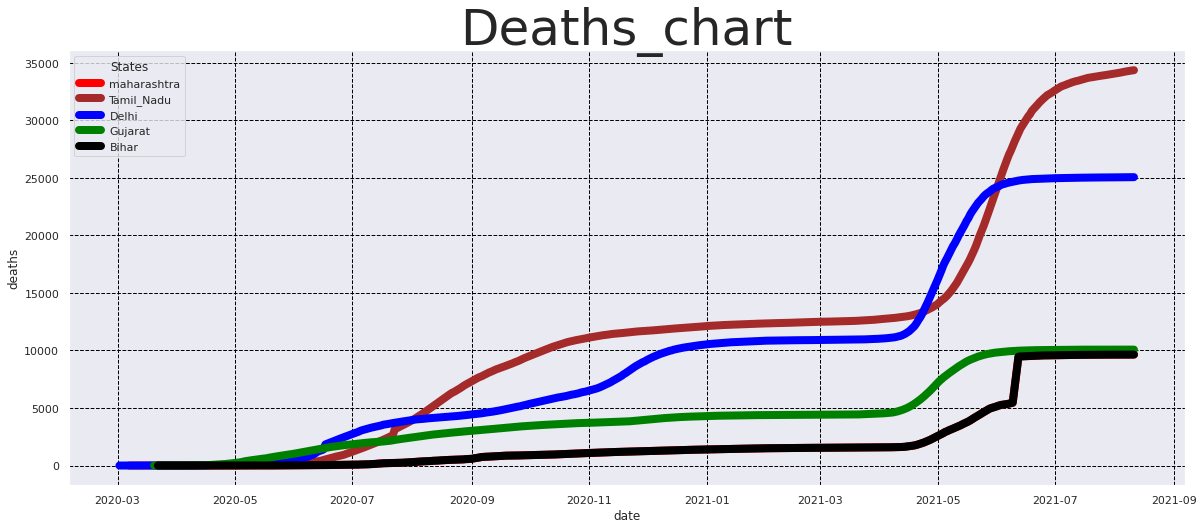

In [32]:
#visualizing deaths cases in top infected states
sns.set(rc={"figure.figsize":(20,8)})
sns.lineplot(x="date",y="deaths",data=Bihar,color="red",linewidth=8)
sns.lineplot(x="date",y="deaths",data=Tamil_Nadu,color="brown",linewidth=8)
sns.lineplot(x="date",y="deaths",data=Delhi,color="blue",linewidth=8)
sns.lineplot(x="date",y="deaths",data=Gujarat,color="green",linewidth=8)
sns.lineplot(x="date",y="deaths",data=Bihar,color="black",linewidth=8)
plt.legend(["maharashtra","Tamil_Nadu","Delhi","Gujarat","Bihar"],title="States")
plt.title("Deaths_chart",size=50)
plt.grid(color="black",linestyle="--")


plt.show()